In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import icecream as ic
import os
from cycler import cycler

In [40]:
## Matplotlib Settings

n = 15
c = plt.get_cmap("viridis")
colors = c(np.arange(0, c.N))
colors = [c(1.*i/n) for i in range(n)]
plt.rcParams["axes.prop_cycle"] = cycler("color", colors)

# tableauの結果
plt.rcParams['axes.prop_cycle']  = cycler(color=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2','#59A14E',
                                                 '#EDC949','#B07AA2','#FF9DA7','#9C755F','#BAB0AC'])

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False


In [67]:
dir_path = '/home/mbpl/morizane/analysis_sensitivity/results'
for pos in [1, 2, 6, 10]:
    for rot in [5, 10, 15]:
        try:
            globals()[f'pos{pos}_rot{rot}'] = pd.read_excel(os.path.join(dir_path, f'sensitivity_indices_pos_{pos}.0_rot_{rot}.0_Salib.xlsx'))
        except Exception:
            continue


In [46]:
locals().keys()

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', 'np', 'pd', 'plt', 'sns', 'ic', 'os', 'cycler', '_i2', '_i3', 'n', 'c', 'colors', '_i4', 'dir_path', 'pos', 'rot', 'pos1_rot5', 'pos1_rot10', 'pos1_rot15', '_i5', 'column_name', '_i6', 'func', 'order', '_i7', 'filtered_data', 'boxplot_data', 'boxplot_df', '_i8', 'x', 'y', 'values', '_i9', '_i10', 'i', 'func_name', '_i11', '_i12', 'func_names', '_i13', '_i14', '_i15', '_i16', 'xc', '_i17', '_i18', '_i19', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i30', '_i31', '_i32', '_i33', '_i34', 'values_rot5', 'values_rot10', 'values_rot15', '_i35', '_i36', 'label', '_i37', '_i38', '_i39', '_i40', '_i41', 'pos2_rot5', 'pos2_rot10', 'pos2_rot15', 'pos6_rot5', 'pos6_rot10', 'pos6_rot15', 'pos10_rot5', 'pos10_rot10', 'p

In [167]:
pos1_rot5[pos1_rot5['order'] == 'second_order']

,Unnamed: 0,function,order,name,value


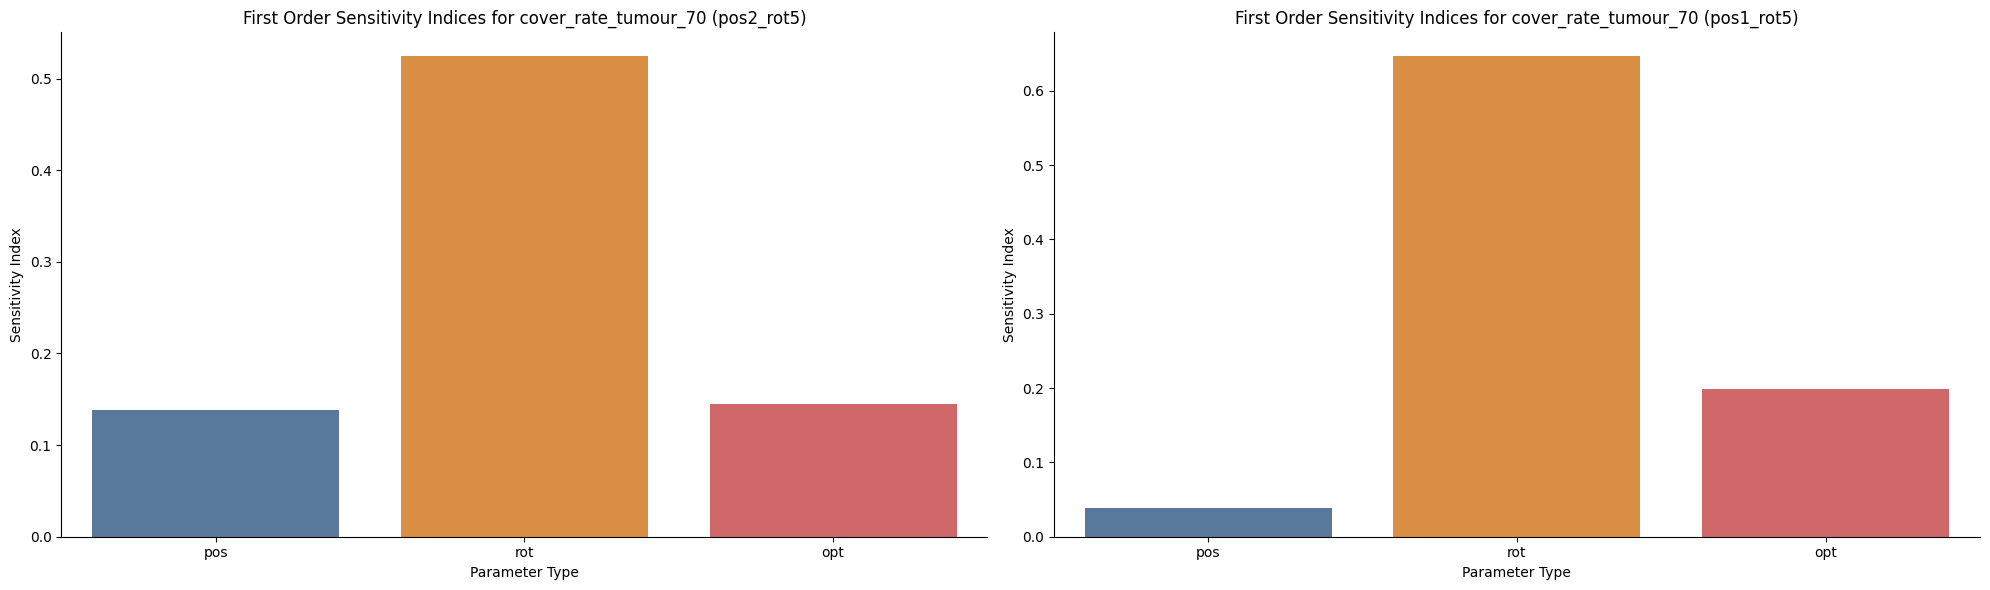

In [48]:
# Define the variables used in the lambda function
func = 'cover_rate_tumour_70'
order = 'first_order'

# Filter the data for 'first_conf' order
filtered_data = pos1_rot5[(pos1_rot5['function'] == func) & (pos1_rot5['order'] == order)]
filtered_data_pos2_rot5 = pos2_rot5[(pos2_rot5['function'] == func) & (pos2_rot5['order'] == order)]

# Update the boxplot data for pos2_rot5
boxplot_data_pos2_rot5 = {
    'pos': filtered_data_pos2_rot5[filtered_data_pos2_rot5['name'] == 'pos']['value'],
    'rot': filtered_data_pos2_rot5[filtered_data_pos2_rot5['name'] == 'rot']['value'],
    'opt': filtered_data_pos2_rot5[filtered_data_pos2_rot5['name'] == 'opt']['value']
}

# Convert to DataFrame
boxplot_df_pos2_rot5 = pd.DataFrame(boxplot_data_pos2_rot5)

# Update the boxplot data for pos1_rot5
boxplot_data_pos1_rot5 = {
    'pos': filtered_data[filtered_data['name'] == 'pos']['value'],
    'rot': filtered_data[filtered_data['name'] == 'rot']['value'],
    'opt': filtered_data[filtered_data['name'] == 'opt']['value']
}

# Convert to DataFrame
boxplot_df_pos1_rot5 = pd.DataFrame(boxplot_data_pos1_rot5)
boxplot_df_pos2_rot5 = pd.DataFrame(boxplot_data_pos2_rot5)
# Create the bar plots with error bars for pos2_rot5 and pos1_rot5 side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot for pos2_rot5
sns.barplot(data=boxplot_df_pos2_rot5, ax=axes[0])
axes[0].set_title('First Order Sensitivity Indices for cover_rate_tumour_70 (pos2_rot5)')
axes[0].set_ylabel('Sensitivity Index')
axes[0].set_xlabel('Parameter Type')

# Plot for pos1_rot5
sns.barplot(data=boxplot_df_pos1_rot5, ax=axes[1])
axes[1].set_title('First Order Sensitivity Indices for cover_rate_tumour_70 (pos1_rot5)')
axes[1].set_ylabel('Sensitivity Index')
axes[1].set_xlabel('Parameter Type')

plt.tight_layout()
plt.show()


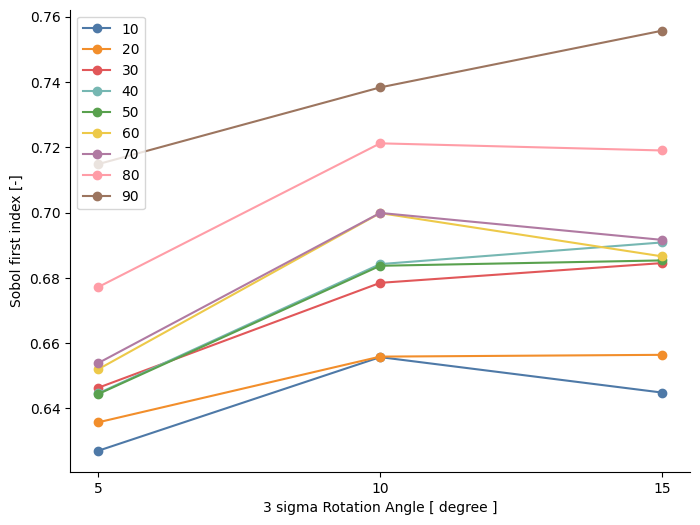

In [49]:
# Extract the values for rot5 and rot10
x = [5, 10, 15]
func = [f'cover_rate_tumour_{i}' for i in range(10, 100, 10)]
y = []

for rot in x:
    values = globals()[f'pos1_rot{rot}'][(globals()[f'pos1_rot{rot}']['function'].isin(func)) & (globals()[f'pos1_rot{rot}']['order'] == 'first_order') & (globals()[f'pos1_rot{rot}']['name'] == 'rot')]['value']
    y.append(values)

func_names = [f.split('_')[-1] for f in func]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-', label=func_names)
plt.xlabel('3 sigma Rotation Angle [ degree ]')
plt.ylabel('Sobol first index [-]')
plt.xticks(x)
plt.legend()
plt.show()


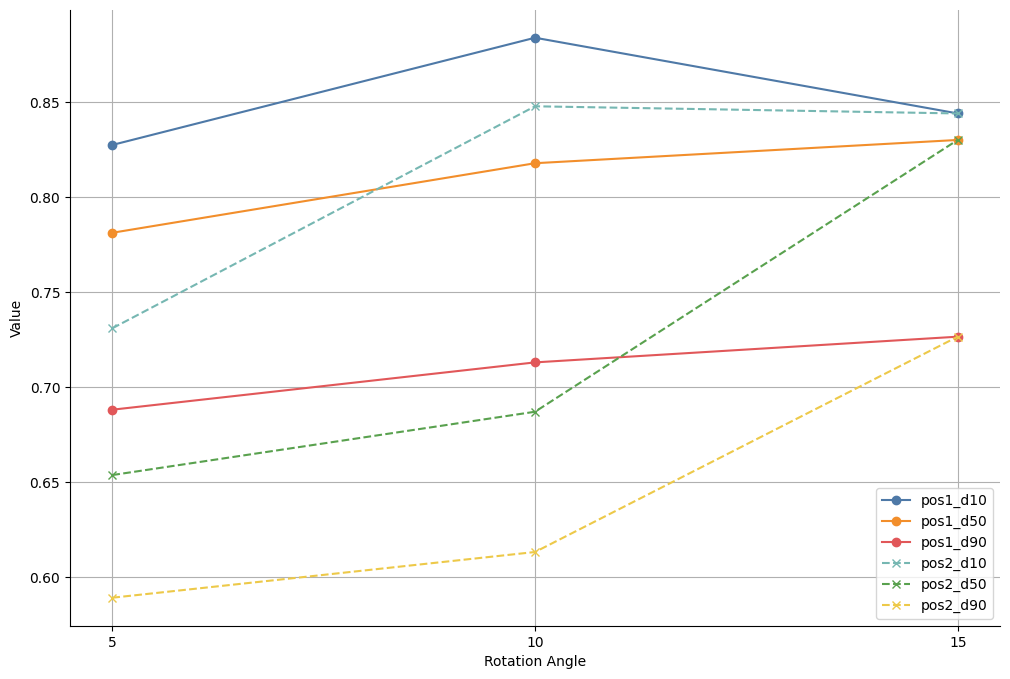

In [53]:
# Extract the values for rot5 and rot10
x = [5, 10, 15]
func = ['dvh_tumour_d10', 'dvh_tumour_d50', 'dvh_tumour_d90']
values_rot5_pos2 = pos2_rot5[(pos2_rot5['function'].isin(func)) & (pos2_rot5['order'] == 'first_order') & (pos2_rot5['name'] == 'rot')]['value'].reset_index(drop=True)
values_rot10_pos2 = pos2_rot10[(pos2_rot10['function'].isin(func)) & (pos2_rot10['order'] == 'first_order') & (pos2_rot10['name'] == 'rot')]['value'].reset_index(drop=True)
values_rot15_pos2 = pos2_rot15[(pos2_rot15['function'].isin(func)) & (pos2_rot15['order'] == 'first_order') & (pos2_rot15['name'] == 'rot')]['value'].reset_index(drop=True)
y_pos2 = [values_rot5_pos2, values_rot10_pos2, values_rot15_pos2]

values_rot5 = pos1_rot5[(pos1_rot5['function'].isin(func)) & (pos1_rot5['order'] == 'first_order') & (pos1_rot5['name'] == 'rot')]['value'].reset_index(drop=True)
values_rot10 = pos1_rot10[(pos1_rot10['function'].isin(func)) & (pos1_rot10['order'] == 'first_order') & (pos1_rot10['name'] == 'rot')]['value'].reset_index(drop=True)
values_rot15 = pos1_rot15[(pos1_rot15['function'].isin(func)) & (pos1_rot15['order'] == 'first_order') & (pos1_rot15['name'] == 'rot')]['value'].reset_index(drop=True)
y = [values_rot5, values_rot10, values_rot15]
# Create the plot
plt.figure(figsize=(12, 8))

# Plot for pos1
for i, label in enumerate(func):
    label = f'pos1_{label.split("_")[-1]}'
    plt.plot(x, [val[i] for val in y], marker='o', linestyle='-', label=label)

# Plot for pos2
for i, label in enumerate(func):
    label = f'pos2_{label.split("_")[-1]}'
    plt.plot(x, [val[i] for val in y_pos2], marker='x', linestyle='--', label=label)

plt.xlabel('Rotation Angle')
plt.ylabel('Value')
plt.xticks(x)
plt.grid(True)
plt.legend()
plt.show()

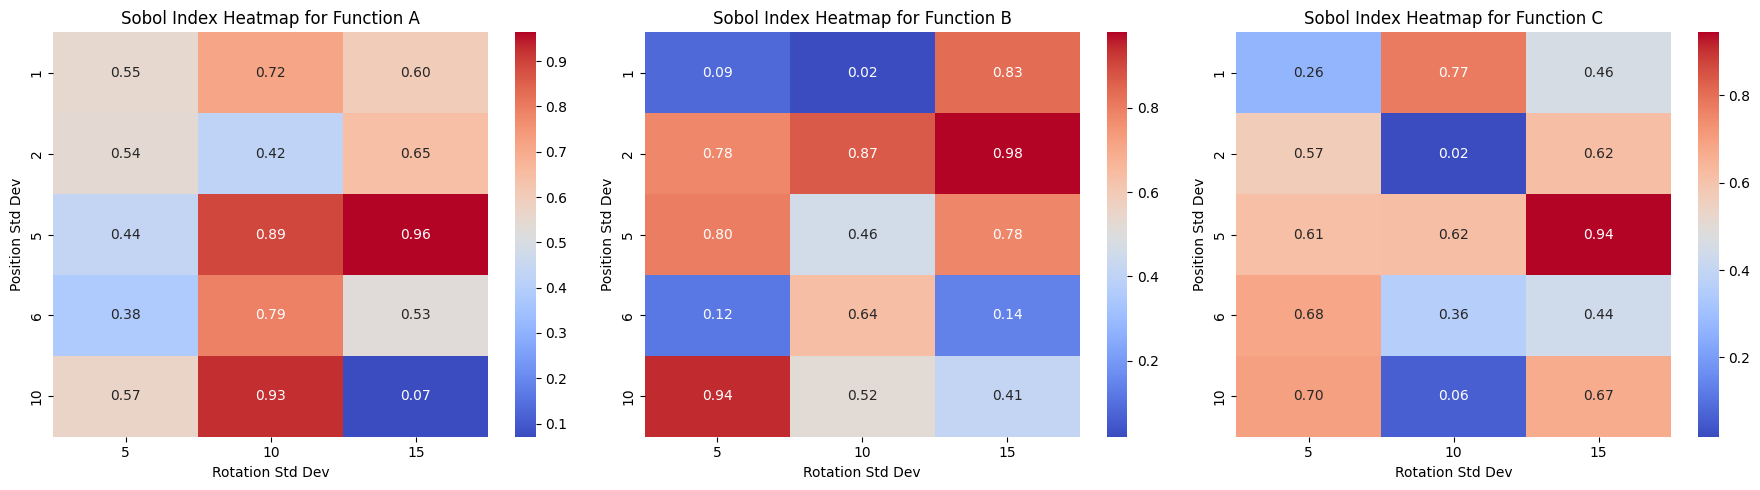

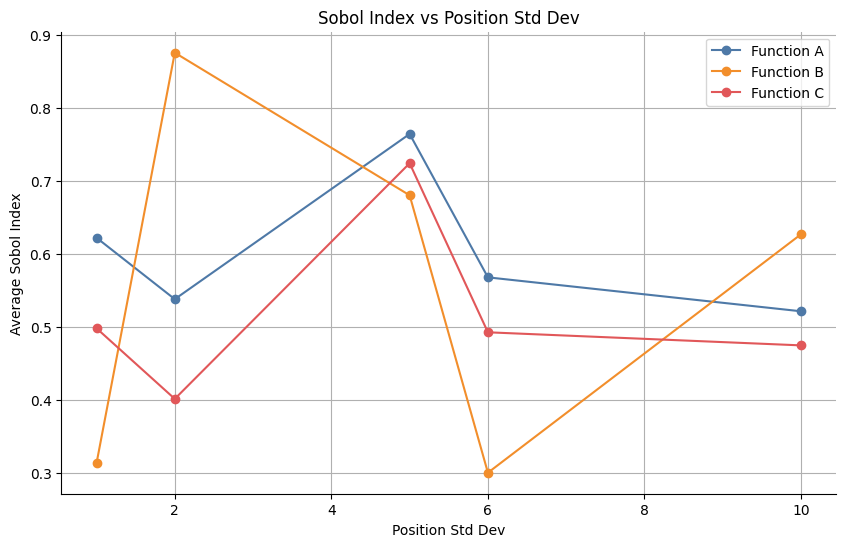

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# サンプルデータ (一次感度指数)
position_std = [1, 2, 5, 6, 10]
rotation_std = [5, 10, 15]
functions = ['A', 'B', 'C']

# 偽の感度指数データを生成 (例として)
np.random.seed(0)
sobol_indices = {
    func: np.random.rand(len(position_std), len(rotation_std))
    for func in functions
}

# ヒートマップの描画
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, func in enumerate(functions):
    sns.heatmap(
        sobol_indices[func],
        xticklabels=rotation_std,
        yticklabels=position_std,
        cmap='coolwarm',
        annot=True, fmt=".2f",
        ax=axes[i]
    )
    axes[i].set_title(f'Sobol Index Heatmap for Function {func}')
    axes[i].set_xlabel('Rotation Std Dev')
    axes[i].set_ylabel('Position Std Dev')

plt.tight_layout()
plt.show()

# 折れ線グラフの描画
plt.figure(figsize=(10, 6))
for func in functions:
    # Positionの標準偏差ごとの平均感度指数を計算
    mean_sobol = sobol_indices[func].mean(axis=1)
    plt.plot(position_std, mean_sobol, marker='o', label=f'Function {func}')

plt.title('Sobol Index vs Position Std Dev')
plt.xlabel('Position Std Dev')
plt.ylabel('Average Sobol Index')
plt.grid(True)
plt.legend()
plt.show()

   Unnamed: 0        function        order name     value  rot  pos
0           0  dvh_tumour_d90  first_order  pos  0.022279    5    1
1           1  dvh_tumour_d90  first_order  rot  0.827452    5    1
2           2  dvh_tumour_d90  first_order  opt  0.059250    5    1
3          12  dvh_normal_d90  first_order  pos  0.010056    5    1
4          13  dvh_normal_d90  first_order  rot  0.014335    5    1


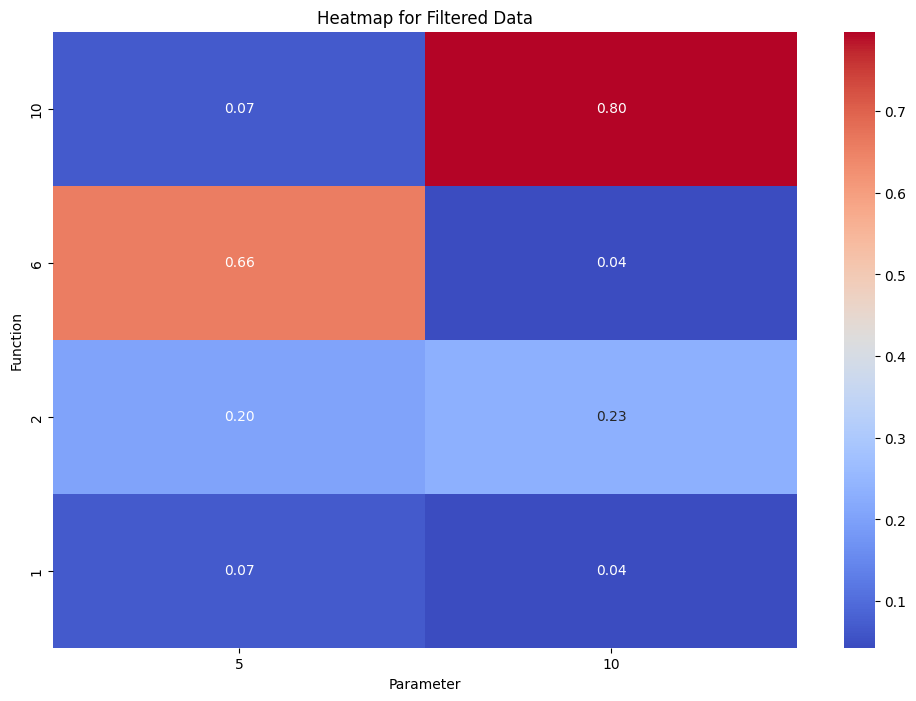

In [142]:
# Extract the data for the specified position and rotation
# Filter the data for the specified position and rotation
filtered_data = pd.DataFrame()
data_list = []
for pos in [1, 2, 6, 10]:
    for rot in [5, 10]:
        try:
            temp_data = globals()[f'pos{pos}_rot{rot}']
            temp_data = temp_data[(temp_data['order'] == 'first_order')].copy()
            temp_data.loc[:, 'rot'] = rot
            temp_data.loc[:, 'pos'] = pos
            data_list.append(temp_data)
        except Exception as e:
            temp_data = pd.DataFrame(columns=['name', 'function', 'order', 'value'])
            temp_data.loc[:, 'rot'] = rot
            temp_data.loc[:, 'pos'] = pos
            temp_data.loc[:, 'value'] = np.nan
            temp_data.loc[:, 'order'] = 'first_order'
            temp_data.loc[:, 'name'] = 'pos'
            data_list.append(temp_data)

filtered_data = pd.concat(data_list, ignore_index=True)
    
print(filtered_data.head(5))
# Pivot the filtered data to create a matrix suitable for a heatmap
heatmap_data = filtered_data[(filtered_data['name'] == 'pos') & (filtered_data['function'] == 'cover_rate_tumour_10')].pivot(index='pos', columns='rot', values='value')

# Check if heatmap_data is empty
if not heatmap_data.empty:
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data.sort_index(ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Heatmap for Filtered Data')
    plt.xlabel('Parameter')
    plt.ylabel('Function')
    plt.show()
else:
    print("No data available for the specified function to plot the heatmap.")
plt.show()


In [143]:
filtered_data = filtered_data.drop(columns=['Unnamed: 0'])
filtered_data

,function,order,name,value,rot,pos
0,dvh_tumour_d90,first_order,pos,0.022279,5,1
1,dvh_tumour_d90,first_order,rot,0.827452,5,1
2,dvh_tumour_d90,first_order,opt,0.059250,5,1
3,dvh_normal_d90,first_order,pos,0.010056,5,1
4,dvh_normal_d90,first_order,rot,0.014335,5,1
...,...,...,...,...,...,...
1387,irrad_volume_normal_0.1,first_order,rot,0.022274,10,10
1388,irrad_volume_normal_0.1,first_order,opt,0.560559,10,10
1389,irrad_volume_tumour_0.1,first_order,pos,0.760930,10,10
1390,irrad_volume_tumour_0.1,first_order,rot,0.089653,10,10


## position_deviation to sobol first order

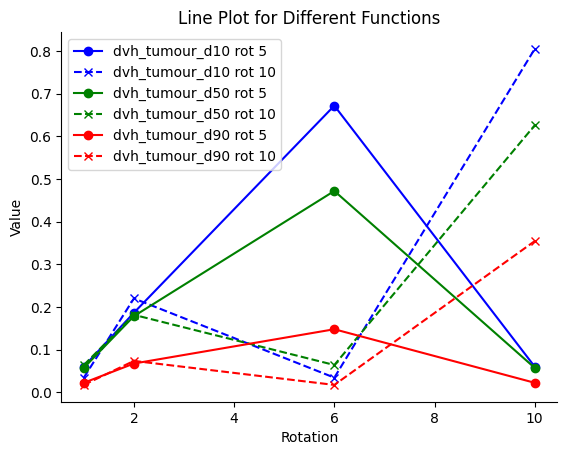

In [165]:
plot_filtered_data = filtered_data[(filtered_data['name'] == 'pos') & (filtered_data['function'] == 'irrad_volume_tumour_0.1')]
plot_filtered_data = plot_filtered_data.sort_values(by='pos')

func_names = ['dvh_tumour_d10', 'dvh_tumour_d50', 'dvh_tumour_d90']
colors = {'dvh_tumour_d10': 'blue', 'dvh_tumour_d50': 'green', 'dvh_tumour_d90': 'red'}

for func in func_names:
    subset = filtered_data[(filtered_data['function'] == func) & (filtered_data['name'] == 'pos')]
    subset = subset.sort_values(by='pos')
    for rot in subset['rot'].unique():
        rot_subset = subset[subset['rot'] == rot]
        rot_subset = rot_subset.sort_values(by='pos')
        if rot == 5:
            plt.plot(rot_subset['pos'], rot_subset['value'], marker='o', linestyle='-', color=colors[func], label=f'{func} rot {rot}')
        elif rot == 10:
            plt.plot(rot_subset['pos'], rot_subset['value'], marker='x', linestyle='--', color=colors[func], label=f'{func} rot {rot}')
        else:
            continue


plt.xlabel('Rotation')
plt.ylabel('Value')
plt.title('Line Plot for Different Functions')
plt.legend()
plt.show()


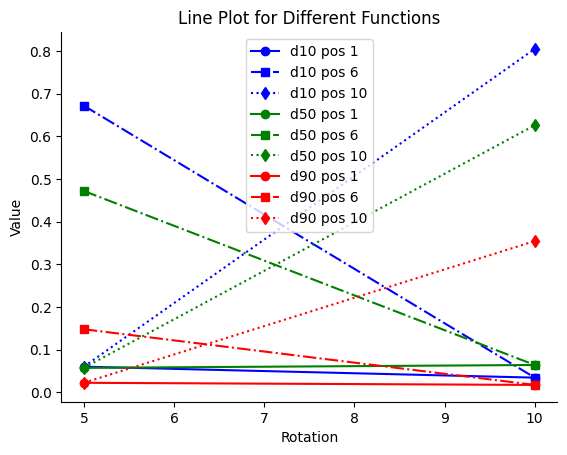

In [178]:
plot_filtered_data = filtered_data[(filtered_data['name'] == 'rot') & (filtered_data['function'] == 'irrad_volume_tumour_0.1')]
plot_filtered_data = plot_filtered_data.sort_values(by='rot')

func_names = ['dvh_tumour_d10', 'dvh_tumour_d50', 'dvh_tumour_d90']
colors = {'dvh_tumour_d10': 'blue', 'dvh_tumour_d50': 'green', 'dvh_tumour_d90': 'red'}

for func in func_names:
    subset = filtered_data[(filtered_data['function'] == func) & (filtered_data['name'] == 'pos')]
    subset = subset.sort_values(by='rot')
    for pos in [1,6,10]:
        pos_subset = subset[subset['pos'] == pos]
        pos_subset = pos_subset.sort_values(by='rot')
        func_label = func.split('_')[-1]
        if pos == 1:
            plt.plot(pos_subset['rot'], pos_subset['value'], marker='o', linestyle='-', color=colors[func], label=f'{func_label} pos {pos}')
        elif pos == 2:
            plt.plot(pos_subset['rot'], pos_subset['value'], marker='x', linestyle='--', color=colors[func], label=f'{func_label} pos {pos}')
        elif pos == 6:
            plt.plot(pos_subset['rot'], pos_subset['value'], marker='s', linestyle='-.', color=colors[func], label=f'{func_label} pos {pos}')
        elif pos == 10:
            plt.plot(pos_subset['rot'], pos_subset['value'], marker='d', linestyle=':', color=colors[func], label=f'{func_label} pos {pos}')
        else:
            continue

plt.xlabel('Rotation')
plt.ylabel('Value')
plt.title('Line Plot for Different Functions')
plt.legend()
plt.show()
